# **Предсказание выживаемости пассажиров Титаника**

- **Исследовательский анализ данных (EDA)**
- **Предварительная обработка данных**
- **Построение и оценка модели логистической регрессии**


In [ ]:
# Импортируем библиотеки для анализа данных и визуализации
import pandas as pd # Работа с таблицами данных
import numpy as np # Математические операции
import matplotlib.pyplot as plt # Построение графиков
import seaborn as sns # Более удобная визуализация

# Настройка стиля графиков и отключение предупреждений
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore') # Игнорирование предупреждений для удобства


## **Загрузка данных**


In [ ]:
# Считываем данные из CSV-файлов
train_df = pd.read_csv('train_1.csv') # Данные для обучения
test_df = pd.read_csv('test_1.csv') # Данные для тестирования

train_df.head() # Просмотр первых 5 строк тренировочного набора


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Первоначальный анализ данных**


In [ ]:
# Информация о данных: количество записей, типы переменных, пропуски
train_df.info()

# Основные статистические характеристики числовых данных
train_df.describe()

# Проверка на наличие пропущенных значений по каждому столбцу
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Примечание:** Видно, что в данных есть пропущенные значения в признаках **Age**, **Cabin** и **Embarked**.


## **Анализ целевой переменной**


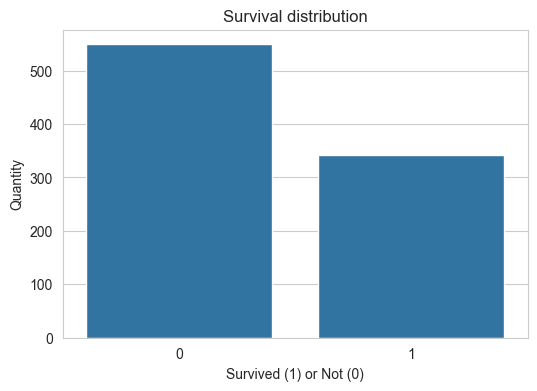

In [ ]:
# Визуализация распределения целевой переменной 'Survived'
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='Survived')
plt.title('Survival distribution')
plt.xlabel('Survived (1) or Not (0)')
plt.ylabel('Quantity')
plt.show()

## **Анализ категориальных признаков**


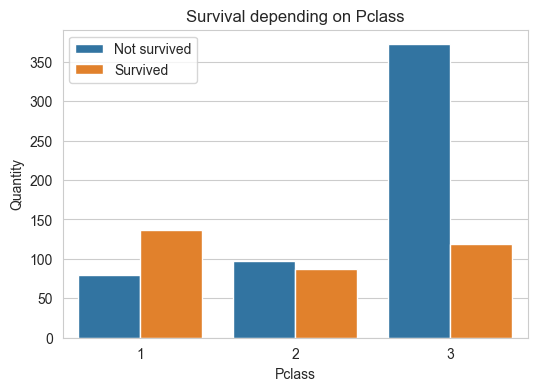

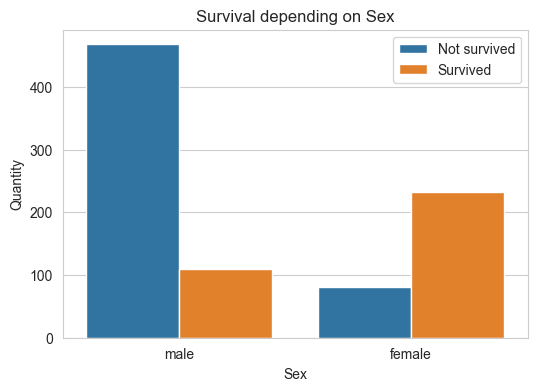

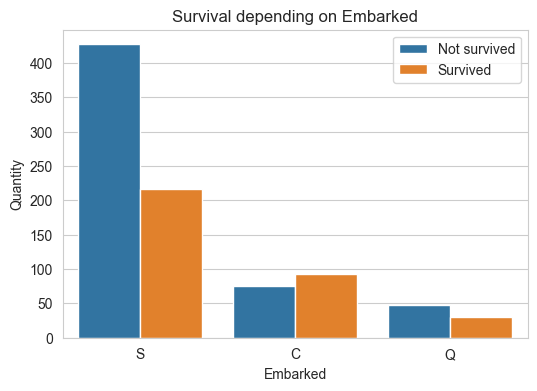

In [ ]:
# Анализ категориальных признаков и их влияния на выживаемость
categorical_features = ['Pclass', 'Sex', 'Embarked']
# Цикл по категориальным признакам для построения графиков
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train_df, x=feature, hue='Survived')
    plt.title(f'Survival depending on {feature}')
    plt.xlabel(feature)
    plt.ylabel('Quantity')
    plt.legend(['Not survived', 'Survived'])
    plt.show()


## **Анализ числовых признаков**


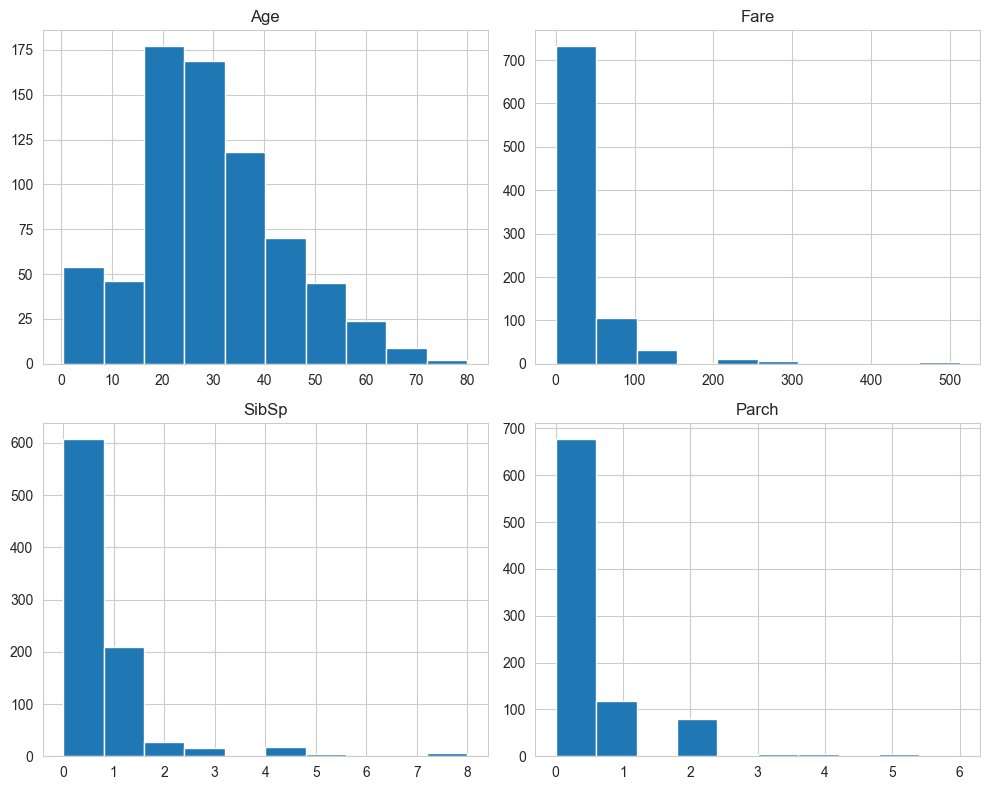

In [ ]:
# Анализ распределения числовых признаков
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
# Построение гистограмм для всех числовых признаков
train_df[numerical_features].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

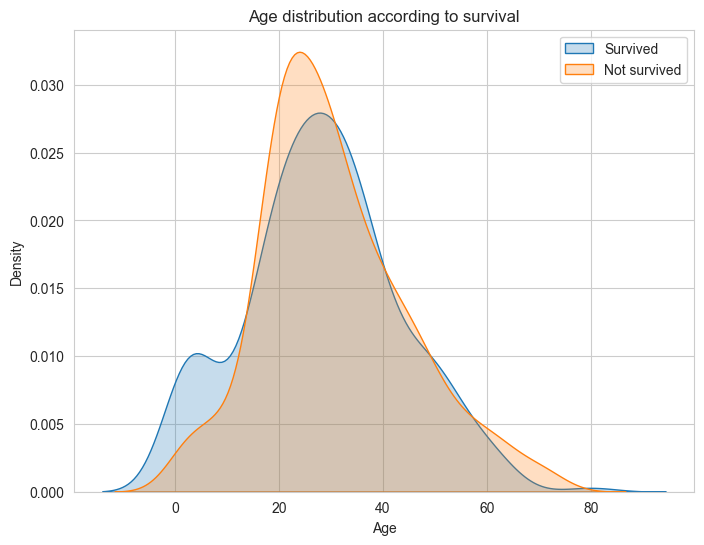

In [ ]:
# Визуализация распределения возраста по группам выживших и погибших
plt.figure(figsize=(8,6))
# Построение графика плотности для возраста выживших
sns.kdeplot(train_df[train_df['Survived']==1]['Age'].dropna(), # Фильтруем только выживших и убираем пропуски
            shade=True, # Заштриховываем область под кривой
            label='Survived') # Добавляем подпись для легенды
# Построение графика плотности для возраста погибших
sns.kdeplot(train_df[train_df['Survived']==0]['Age'].dropna(), shade=True, label='Not survived')
plt.title('Age distribution according to survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


## **Корреляционная матрица числовых признаков**


Missing values in numerical features:
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


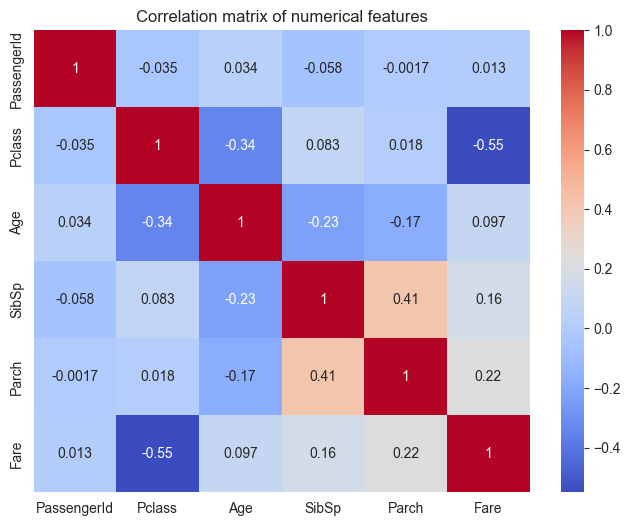

In [ ]:
# Проверка пропущенных значений в числовых столбцах
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.drop('Survived')
print("Missing values in numerical features:")
print(train_df[numeric_cols].isnull().sum())

# Заполнение пропусков в 'Age' и 'Fare' медианным значением
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# Корреляционная матрица для числовых признаков
corr_matrix = train_df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # Тепловая карта корреляций
plt.title('Correlation matrix of numerical features')
plt.show()

## **Предварительная обработка данных**


### **Обработка пропущенных значений**


In [ ]:
# Заполняем пропуски в столбце 'Embarked' модой (самое частое значение)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
# Заполняем пропуски в столбце 'Fare' медианным значением в тестовом наборе
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
# Заполняем пропуски в столбце 'Age' медианным значением в тестовом наборе
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
# Заполняем пропуски в столбце 'Embarked' модой (самое частое значение) в тестовом наборе
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

### **Преобразование категориальных признаков**


In [ ]:
# Кодирование категориальных признаков с использованием one-hot encoding
# Преобразуем категориальные признаки 'Sex' и 'Embarked' в dummy-переменные
# Используем параметр drop_first=True, чтобы избежать проблемы мультиколлинеарности
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
# Преобразуем признак 'Pclass' в строковый тип данных
train_df['Pclass'] = train_df['Pclass'].astype(str)
test_df['Pclass'] = test_df['Pclass'].astype(str)
# Применяем one-hot encoding к 'Pclass' с удалением первого столбца (drop_first=True)
train_df = pd.get_dummies(train_df, columns=['Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Pclass'], drop_first=True)

### **Удаление ненужных признаков**


In [ ]:
# Удаляем ненужные столбцы: идентификатор пассажира, имя, билет, каюту
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### **Проверка соответствия признаков в обучающем и тестовом наборах**


In [ ]:
print("Training set columns:", train_df.columns)
print("Test set columns:", test_df.columns)


Training set columns: Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')
Test set columns: Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3'],
      dtype='object')


In [ ]:
# Определяем отсутствующие столбцы в тестовом наборе (по сравнению с обучающим)
missing_cols = set(train_df.columns) - set(test_df.columns)
# Убираем целевой столбец 'Survived' из списка (его не должно быть в тестовых данных)
missing_cols.discard('Survived')
# Добавляем отсутствующие столбцы в тестовый набор и заполняем их нулями
for col in missing_cols:
    test_df[col] = 0
# Упорядочиваем столбцы тестового набора так же, как в обучающем (без 'Survived')
test_df = test_df[train_df.drop('Survived', axis=1).columns]

### **Разделение данных на признаки и целевую переменную**


In [ ]:
# Разделение признаков (X) и целевой переменной (y)
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

### **Масштабирование признаков**


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_df)

### **Разделение данных на обучающую и валидационную выборки**


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## **Построение и обучение модели**


In [ ]:
# Импортируем и инициализируем модель логистической регрессии
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
# Обучаем модель на тренировочных данных
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## **Оценка модели**


In [ ]:
# Оценка модели на валидационных данных
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = logreg.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy on the validation set: {accuracy:.2f}')

Accuracy on the validation set: 0.80


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


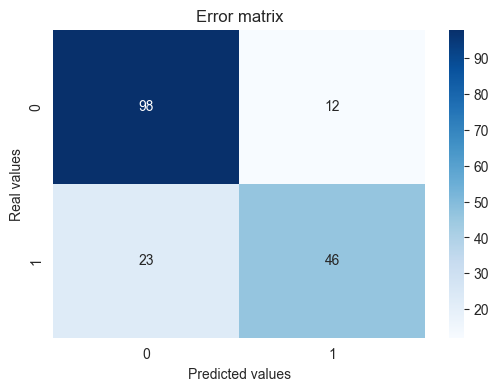

In [ ]:
# Матрица ошибок
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,4))
# Строим тепловую карту корреляций между числовыми признаками
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Error matrix')
plt.ylabel('Real values')
plt.xlabel('Predicted values')
plt.show()

## **Анализ коэффициентов модели**


In [ ]:
# Создаем DataFrame для хранения признаков модели и соответствующих коэффициентов из логистической регрессии
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})
# Добавляем новый столбец с абсолютными значениями коэффициентов для анализа значимости признаков
coefficients['abs_coef'] = coefficients['Coefficient'].abs()
# Сортируем DataFrame по абсолютным значениям коэффициентов в порядке убывания,
# чтобы наиболее значимые признаки были в начале
coefficients.sort_values(by='abs_coef', ascending=False, inplace=True)
# Удаляем столбец с абсолютными значениями коэффициентов, так как он был нужен только для сортировки
coefficients.drop('abs_coef', axis=1)

,Feature,Coefficient
4,Sex_male,-1.263113
8,Pclass_3,-1.070370
0,Age,-0.493287
7,Pclass_2,-0.371656
1,SibSp,-0.270737
6,Embarked_S,-0.187460
3,Fare,0.128032
5,Embarked_Q,0.083381
2,Parch,-0.067470


## **Предсказания на тестовом наборе**


In [ ]:
# Получаем предсказания модели для тестового набора данных
# Логистическая регрессия предсказывает вероятности,здесь используем метод .predict(),
# чтобы получить окончательные классы (1 - выжил, 0 - не выжил)
test_predictions = logreg.predict(test_scaled)

In [ ]:

# Загружаем идентификаторы пассажиров из исходного тестового файла
test_passenger_ids = pd.read_csv('test_1.csv')['PassengerId']
# Создаем DataFrame для сохранения результатов предсказаний
# Включаем две колонки: идентификатор пассажира (PassengerId) и предсказанный класс (Survived)
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions.astype(int)
})
# Сохраняем DataFrame с результатами в CSV-файл под названием 'submission.csv'
# Параметр index=False исключает индексы строк из сохраненного файла
submission.to_csv('submission.csv', index=False)
print("submission.csv has been saved")

submission.csv has been saved


# **Прогнозирование выживаемости пассажиров Титаника**

# Метод логистической регрессии

Логистическая регрессия — это популярный метод бинарной классификации в машинном обучении. Он используется для предсказания вероятности события (например, "выжил пассажир или нет") на основе одного или нескольких независимых признаков (возраст, пол, класс и другие).

## Основные шаги метода логистической регрессии:

### Шаг 1: Постановка задачи  
Задача логистической регрессии заключается в предсказании вероятности принадлежности объекта к одному из двух классов. В нашем случае это задача классификации пассажиров "выжил" (1) или "не выжил" (0).

### Шаг 2: Линейная комбинация признаков  
Основой модели является линейная комбинация признаков:  
$$z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n$$  

Где:  
- $z$ — взвешенная сумма входных признаков;  
- $\beta_0$ — свободный член (смещение);  
- $\beta_i$ — коэффициенты, которые определяют вклад признаков $X_i$ в предсказание.  

### Шаг 3: Функция сигмоида  
Чтобы преобразовать линейную комбинацию в вероятность, используется функция сигмоида:  
$$P(event) = \frac{1}{1 + e^{-z}}$$  

Эта функция сжимает диапазон значений $z$ в интервал от 0 до 1, что позволяет интерпретировать результат как вероятность события.

### Шаг 4: Оптимизация параметров  
Коэффициенты $\beta_0, \beta_1, ... , \beta_n$ оптимизируются с использованием метода максимального правдоподобия, который минимизирует разницу между предсказанными вероятностями и реальными значениями. На практике часто применяется метод градиентного спуска для нахождения оптимальных значений параметров.

---

## Преимущества логистической регрессии  
- Простота реализации и интерпретации.  
- Возможность анализа вклада каждого признака (через коэффициенты).  
- Широкое применение для задач бинарной классификации (например, медицина, маркетинг, анализ поведения пользователей).

---

## Применение в данной работе  
В данном случае логистическая регрессия используется для предсказания выживания пассажиров на основе их характеристик: возраст, пол, класс, количество родственников на борту, стоимость билета и другие. Модель обучается на обучающем наборе данных, а затем применяется для предсказания вероятности выживания на тестовых данных.

Формула вероятности выживания в задании:  
$$P(Survived = 1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot Age + \beta_2 \cdot Fare + ... )}}$$  

Модель дала возможность понять, какие признаки сильнее всего влияют на вероятность выживания (например, пассажиры женского пола или пассажиры 1-го класса имеют больше шансов выжить).


## Методы и этапы анализа

### Исследовательский анализ данных (EDA):
1. Проанализированы пропущенные значения и распределения целевой переменной.
2. Построены визуализации для изучения взаимосвязей между признаками.
3. Определены важные корреляции между числовыми признаками, которые влияют на вероятность выживания.

### Предварительная обработка данных:
1. Пропущенные значения в возрасте ('Age') заменены медианой.
2. Категориальные переменные ('Sex', 'Embarked') преобразованы в числовые с помощью one-hot encoding.
3. Удалены признаки, которые не влияют на предсказание (например, 'Name', 'Cabin').

### Построение модели:
1. Для задачи бинарной классификации выбрана (по условию задания) модель логистической регрессии.
2. Модель обучена на тренировочных данных и протестирована на тестовой выборке.

## Результаты анализа

- Точность модели составила 80% на тестовой выборке.
- Основные выводы:
  - Пол пассажира ('Sex') и класс каюты ('Pclass') оказались наиболее важными факторами выживания.
  - Логистическая регрессия продемонстрировала хорошие результаты, что делает её подходящей для данной задачи.

## Заключение

Применение логистической регрессии позволило построить модель для прогнозирования выживаемости пассажиров Титаника.
